In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#KNN - in a cata and dog dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

c:\Users\sakshi prajapat\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\sakshi prajapat\.cache\kagglehub\datasets\samuelcortinhas\cats-and-dogs-image-classification\versions\4


In [3]:
! kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
License(s): CC0-1.0
cats-and-dogs-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_path = "cats-and-dogs-image-classification.zip"
data_path = "Dog Cat Dataset"
with zipfile.ZipFile(zip_path, 'r') as file :
    file.extractall(data_path)
    file.close

In [5]:
# path of test and train 
test="C:\\Users\\sakshi prajapat\\Desktop\\growtech\\Dog Cat Dataset\\test"
train="C:\\Users\\sakshi prajapat\\Desktop\\growtech\\Dog Cat Dataset\\train"

In [6]:
# image generation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
data_gen=ImageDataGenerator(rescale=1.0/255.0,)

In [8]:
# training data 
train_data=data_gen.flow_from_directory(train,target_size=(150,150),class_mode='categorical',batch_size=32)

Found 557 images belonging to 2 classes.


In [9]:
# for checking exiting class
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
# testing data
test_data=data_gen.flow_from_directory(test,target_size=(150,150),class_mode='categorical',batch_size=32)

Found 140 images belonging to 2 classes.


In [11]:
# for checking exiting class
test_data.class_indices

{'cats': 0, 'dogs': 1}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten,Dense,Dropout

In [13]:
model=Sequential()
# first input layers
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# second layer

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
# fully conntected layer

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# output layer

model.add(Dense(2,activation='sigmoid'))

c:\Users\sakshi prajapat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# model optimizer

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# model summery
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,610 (40.58 MB)

 Trainable params: 10,636,610 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.fit(train_data,validation_data=(test_data),epochs=25)

c:\Users\sakshi prajapat\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 786ms/step - accuracy: 0.4683 - loss: 2.5040 - val_accuracy: 0.5214 - val_loss: 0.6931
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 410ms/step - accuracy: 0.5413 - loss: 0.6882 - val_accuracy: 0.5643 - val_loss: 0.6876
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 424ms/step - accuracy: 0.6717 - loss: 0.6575 - val_accuracy: 0.5714 - val_loss: 0.6679
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 422ms/step - accuracy: 0.7446 - loss: 0.5478 - val_accuracy: 0.6643 - val_loss: 0.6352
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 417ms/step - accuracy: 0.8130 - loss: 0.4539 - val_accuracy: 0.6929 - val_loss: 0.6593
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 437ms/step - accuracy: 0.8971 - loss: 0.3103 - val_accuracy: 0.6357 - val_loss: 0.6600
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.9333 - loss: 0.2559 - val_accuracy: 0.6214 - val_loss: 1.0200
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 400ms/step - accuracy: 0.9351 - loss: 0.1833 - val_accuracy: 0

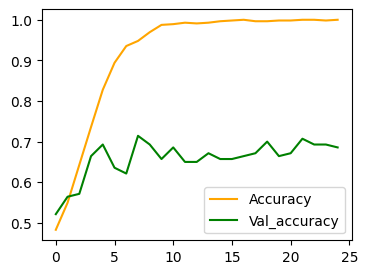

In [17]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(4,3))
plt.plot(model.history.history['accuracy'],color="orange",label='Accuracy')
plt.plot(model.history.history['val_accuracy'],color='green',label='Val_accuracy')
plt.legend()
plt.show()

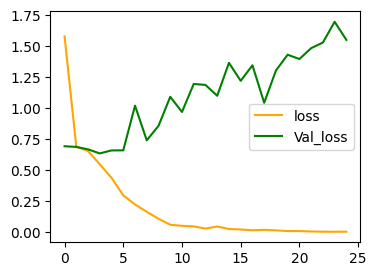

In [18]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(4,3))
plt.plot(model.history.history['loss'],color="orange",label='loss')
plt.plot(model.history.history['val_loss'],color='green',label='Val_loss')
plt.legend()
plt.show()

In [19]:
# model saving in directory
model.save('CatDogImagePredictions.h5')

In [20]:
# path of saving model
from tensorflow.keras.models import load_model
mod=load_model('C:\\Users\\sakshi prajapat\\Desktop\\growtech\\CatDogImagePredictions.h5')

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

class_label=['Cat','Dog']
img_path = 'C:\\Users\\sakshi prajapat\\Desktop\\growtech\\Dog Cat Dataset\\test\\dogs\\dog_528.jpg'

img = image.load_img(img_path,target_size=(150,150))
img_arr=image.img_to_array(img)
img_arr=np.expand_dims(img_arr,axis=0)
img_arr=img_arr/255.0

In [29]:
# prediction

prediction=mod.predict(img_arr)
predicted_class=np.argmax(prediction)
predicted_label=class_label[predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


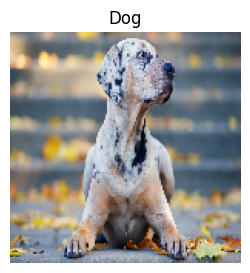

In [30]:
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title(predicted_label)
plt.axis('off')
plt.show()
